In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv('Water_Consumption.csv' , parse_dates=['Month Date'])
df

,Charge Year,Month Name,Month Date,Customer Class,Consumption
0,2001,November,2001-11-01,Residential,355785.00
1,2001,November,2001-11-01,Commercial,309919.00
2,2001,November,2001-11-01,Interdepartmental,9546.00
3,2001,November,2001-11-01,Other,113723.00
4,2001,December,2001-12-01,Residential,1071360.00
...,...,...,...,...,...
1023,2023,February,2023-02-01,Commercial,745726.00
1024,2023,March,2023-03-01,Interdepartmental,30874.03
1025,2023,March,2023-03-01,Other,102670.00
1026,2023,March,2023-03-01,Commercial,748999.00


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Charge Year     1028 non-null   int64         
 1   Month Name      1028 non-null   object        
 2   Month Date      1028 non-null   datetime64[ns]
 3   Customer Class  1028 non-null   object        
 4   Consumption     1028 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 40.3+ KB


In [39]:
df.isnull().sum()

Charge Year       0
Month Name        0
Month Date        0
Customer Class    0
Consumption       0
dtype: int64

In [40]:
df.rename(columns={'Month Date':'Date','Customer Class':'Customer_Class','Month Name':'Month_Name','Charge Year':'Year'} , inplace=True)

In [41]:
df["Customer_Class_int"] = df.Customer_Class.astype('category').cat.codes
df["Month_int"] = df.Month_Name.astype('category').cat.codes
df

,Year,Month_Name,Date,Customer_Class,Consumption,Customer_Class_int,Month_int
0,2001,November,2001-11-01,Residential,355785.00,3,9
1,2001,November,2001-11-01,Commercial,309919.00,0,9
2,2001,November,2001-11-01,Interdepartmental,9546.00,1,9
3,2001,November,2001-11-01,Other,113723.00,2,9
4,2001,December,2001-12-01,Residential,1071360.00,3,2
...,...,...,...,...,...,...,...
1023,2023,February,2023-02-01,Commercial,745726.00,0,3
1024,2023,March,2023-03-01,Interdepartmental,30874.03,1,7
1025,2023,March,2023-03-01,Other,102670.00,2,7
1026,2023,March,2023-03-01,Commercial,748999.00,0,7


In [42]:
import warnings; 
warnings.simplefilter('ignore')

In [43]:
df_train = df.rename(columns={'Consumption': 'y', 'Date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])

In [44]:
df_train.set_index('Year' , inplace=True)


In [45]:
df_train.tail()

,Month_Name,ds,Customer_Class,y,Customer_Class_int,Month_int,y_orig
Year,,,,,,,
2023,February,2023-02-01,Commercial,13.522114,0,3,745726.00
2023,March,2023-03-01,Interdepartmental,10.337671,1,7,30874.03
2023,March,2023-03-01,Other,11.539275,2,7,102670.00
2023,March,2023-03-01,Commercial,13.526493,0,7,748999.00
2023,March,2023-03-01,Residential,13.659351,3,7,855423.00


In [46]:
df = df_train
df_train = df.loc[2001:2018]
df_t = df_train



In [47]:
df_test = df.loc[2019:]


In [48]:
df_test

,Month_Name,ds,Customer_Class,y,Customer_Class_int,Month_int,y_orig
Year,,,,,,,
2019,January,2019-01-01,Residential,13.689102,3,4,881255.00
2019,January,2019-01-01,Commercial,13.563214,0,4,777014.00
2019,January,2019-01-01,Interdepartmental,10.441705,1,4,34259.01
2019,January,2019-01-01,Other,11.488459,2,4,97583.00
2019,February,2019-02-01,Interdepartmental,10.071364,1,3,23655.82
...,...,...,...,...,...,...,...
2023,February,2023-02-01,Commercial,13.522114,0,3,745726.00
2023,March,2023-03-01,Interdepartmental,10.337671,1,7,30874.03
2023,March,2023-03-01,Other,11.539275,2,7,102670.00


In [49]:
import pystan
from prophet import Prophet

In [50]:

model_new = Prophet()
model_new.add_regressor('Customer_Class_int')
model_new.add_regressor('Month_int')

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path


In [51]:
model_new.fit(df_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\sweth\AppData\Local\Temp\tmp8bw0cro3\hytfxhfj.json
DEBUG:cmdstanpy:input tempfile: C:\Users\sweth\AppData\Local\Temp\tmp8bw0cro3\ydlz37hn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\sweth\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=53319', 'data', 'file=C:\\Users\\sweth\\AppData\\Local\\Temp\\tmp8bw0cro3\\hytfxhfj.json', 'init=C:\\Users\\sweth\\AppData\\Local\\Temp\\tmp8bw0cro3\\ydlz37hn.json', 'output', 'file=C:\\Users\\sweth\\AppData\\Local\\Temp\\tmp8bw0cro3\\prophet_modelth42y8ab\\prophet_model-20230416135804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:58:04 - cmdstanpy - INFO - Chain [1] start processing
I

In [52]:
future_data = model_new.make_future_dataframe(periods=365, freq = 'D')
     

In [53]:
future_data.tail(5)


,ds
566,2019-11-27
567,2019-11-28
568,2019-11-29
569,2019-11-30
570,2019-12-01


In [54]:
future_data.tail(5)


,ds
566,2019-11-27
567,2019-11-28
568,2019-11-29
569,2019-11-30
570,2019-12-01


In [55]:
df_t=df_t.append(df_test)
df_t = df_t.rename(columns={'Consumption': 'y', 'Date':'ds'})
future_data=df[['ds', 'Customer_Class_int', 'Month_int']]

In [56]:
future_data

,ds,Customer_Class_int,Month_int
Year,,,
2001,2001-11-01,3,9
2001,2001-11-01,0,9
2001,2001-11-01,1,9
2001,2001-11-01,2,9
2001,2001-12-01,3,2
...,...,...,...
2023,2023-02-01,0,3
2023,2023-03-01,1,7
2023,2023-03-01,2,7


In [57]:
forecast_data = model_new.predict(future_data)

In [58]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1023,2023-02-01,11.964412,10.288624,13.558818
1024,2023-03-01,12.032039,10.368922,13.705527
1025,2023-03-01,12.145554,10.551453,13.639322
1026,2023-03-01,12.259068,10.589993,13.923215
1027,2023-03-01,12.372583,10.754608,13.974399


In [59]:
forecast_data


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Customer_Class_int,Customer_Class_int_lower,Customer_Class_int_upper,Month_int,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-11-01,12.659809,11.108956,14.453154,12.659809,12.659809,0.170272,0.170272,0.170272,0.089117,...,0.259388,0.259388,0.259388,-0.164472,-0.164472,-0.164472,0.0,0.0,0.0,12.754726
1,2001-11-01,12.659809,10.718392,14.009759,12.659809,12.659809,-0.170272,-0.170272,-0.170272,0.089117,...,-0.081155,-0.081155,-0.081155,-0.164472,-0.164472,-0.164472,0.0,0.0,0.0,12.414182
2,2001-11-01,12.659809,10.831428,14.114058,12.659809,12.659809,-0.056757,-0.056757,-0.056757,0.089117,...,0.032359,0.032359,0.032359,-0.164472,-0.164472,-0.164472,0.0,0.0,0.0,12.527697
3,2001-11-01,12.659809,11.000427,14.261715,12.659809,12.659809,0.056757,0.056757,0.056757,0.089117,...,0.145874,0.145874,0.145874,-0.164472,-0.164472,-0.164472,0.0,0.0,0.0,12.641211
4,2001-12-01,12.659436,10.841452,14.181553,12.659436,12.659436,0.170272,0.170272,0.170272,-0.089117,...,0.081155,0.081155,0.081155,-0.126066,-0.126066,-0.126066,0.0,0.0,0.0,12.614525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,2023-02-01,12.723410,10.288624,13.558818,12.718879,12.728358,-0.170272,-0.170272,-0.170272,-0.063655,...,-0.233927,-0.233927,-0.233927,-0.525071,-0.525071,-0.525071,0.0,0.0,0.0,11.964412
1024,2023-03-01,12.724073,10.368922,13.705527,12.719505,12.729113,-0.170272,-0.170272,-0.170272,0.038193,...,-0.132079,-0.132079,-0.132079,-0.559955,-0.559955,-0.559955,0.0,0.0,0.0,12.032039
1025,2023-03-01,12.724073,10.551453,13.639322,12.719445,12.729178,-0.056757,-0.056757,-0.056757,0.038193,...,-0.018564,-0.018564,-0.018564,-0.559955,-0.559955,-0.559955,0.0,0.0,0.0,12.145554
1026,2023-03-01,12.724073,10.589993,13.923215,12.719420,12.729230,0.056757,0.056757,0.056757,0.038193,...,0.094950,0.094950,0.094950,-0.559955,-0.559955,-0.559955,0.0,0.0,0.0,12.259068


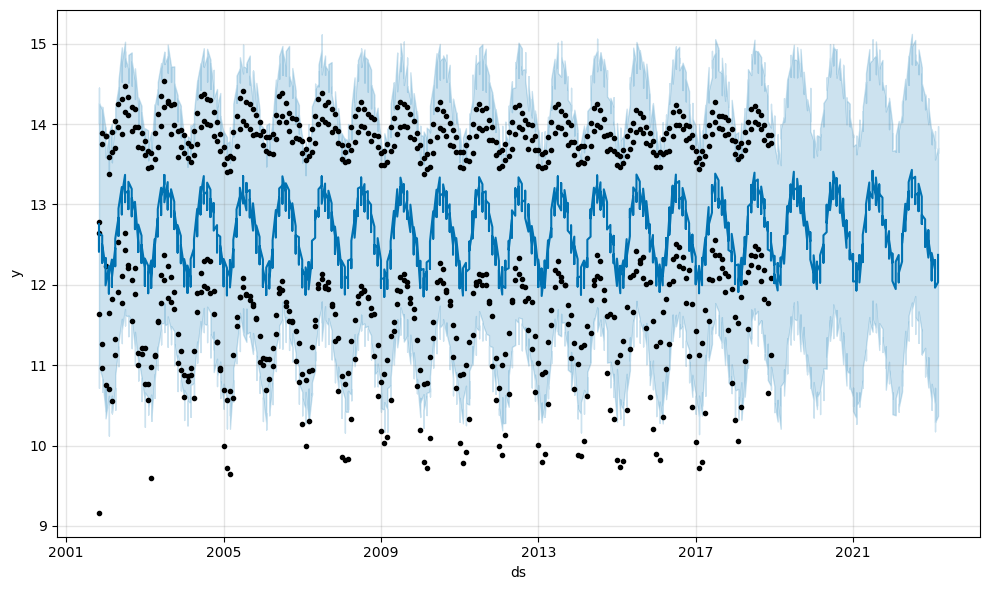

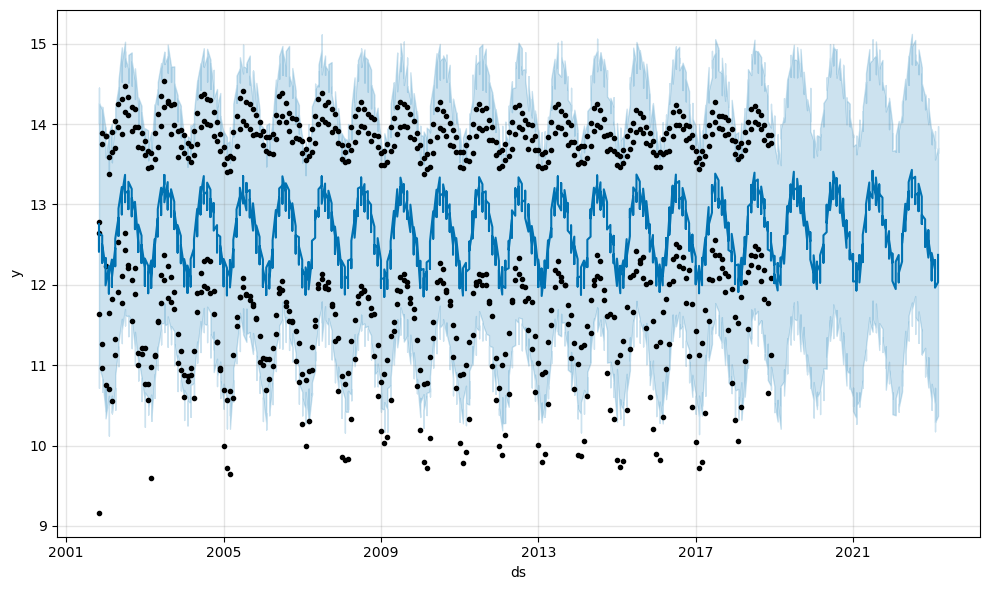

In [60]:
model_new.plot(forecast_data)

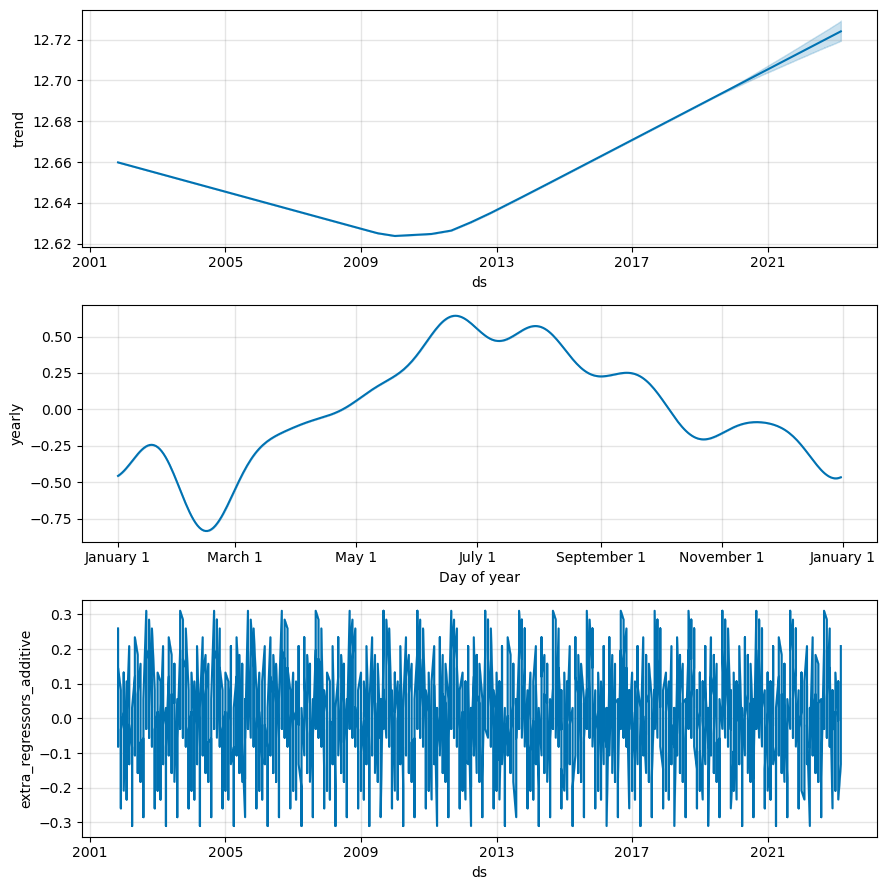

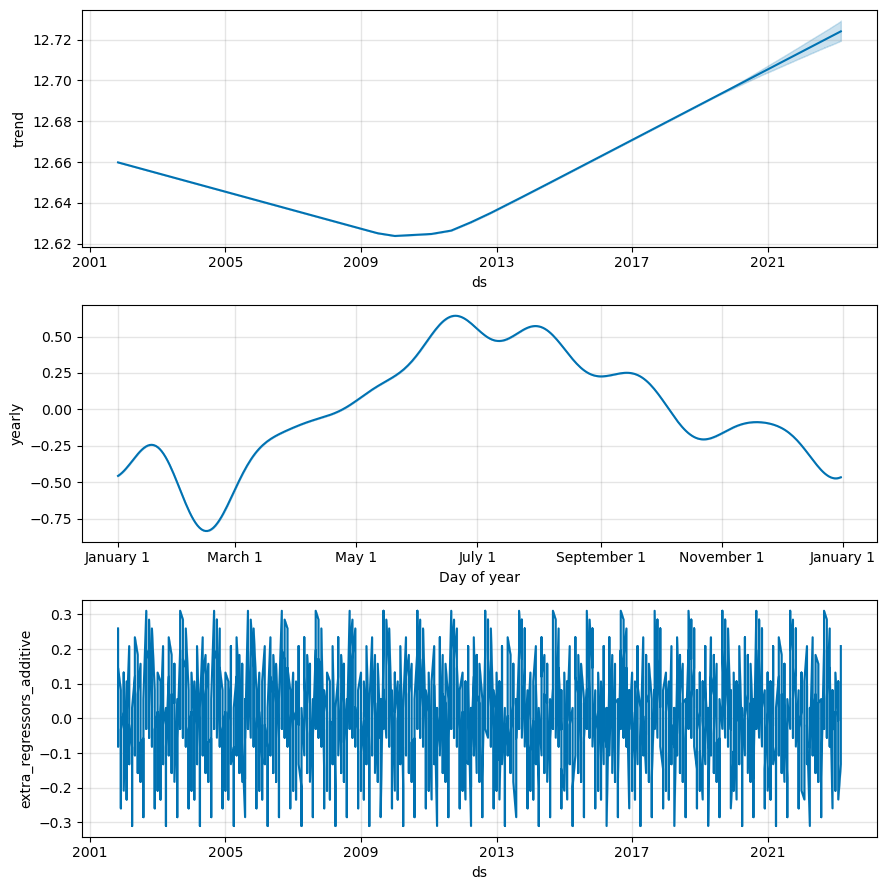

In [61]:
model_new.plot_components(forecast_data)

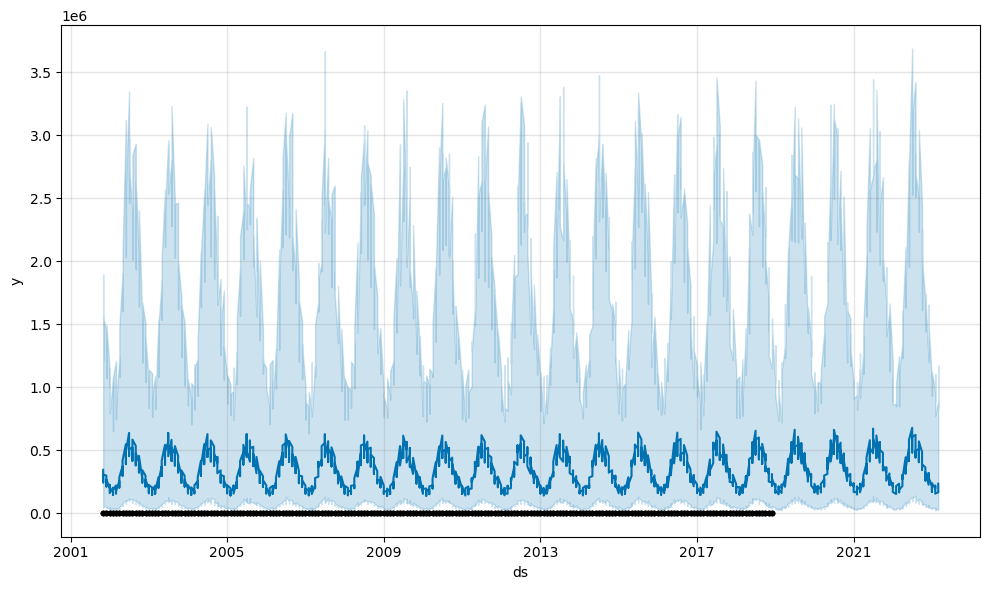

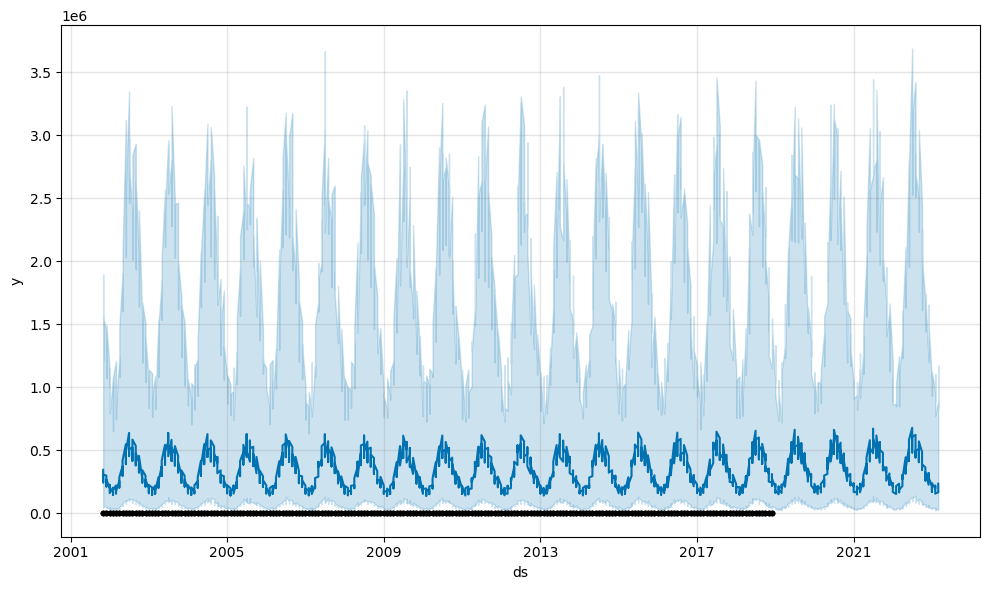

In [62]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model_new.plot(forecast_data_orig)